# Financial NLP Parser - Complete Analysis

In [1]:
import sys
sys.path.append('../src')
from parser import SECFilingParser, MockSECFetcher, FinancialMetricExtractor
from visualizations import FinancialVisualizer
import matplotlib.pyplot as plt
%matplotlib inline

## Fetch SEC Filing

In [2]:
# Fetch mock 10-K filing
fetcher = MockSECFetcher()
filing_text = fetcher.fetch_filing('AAPL', '10-K')

print(f'Filing length: {len(filing_text)} characters')
print('\nFirst 500 characters:')
print(filing_text[:500])

Filing length: 1832 characters

First 500 characters:

        UNITED STATES SECURITIES AND EXCHANGE COMMISSION
        Washington, D.C. 20549
        
        FORM 10-K
        ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) 
        OF THE SECURITIES EXCHANGE ACT OF 1934
        
        For the fiscal year ended December 31, 2023
        
        AAPL Corporation
        
        ITEM 1A. RISK FACTORS
        
        Our business faces significant risks and uncertainties. Market conditions may 
        adversely affect our operations. Competition


## Parse Filing

In [3]:
parser = SECFilingParser()
results = parser.parse_filing(filing_text, ticker='AAPL', filing_type='10-K')

print('\nExtracted metrics:')
for metric, value in results['metrics'].items():
    print(f'  {metric}: ${value:,.1f}M')


📄 Parsing 10-K filing...
  Extracting financial metrics...
  Analyzing sentiment...
  Extracting entities...
  Identifying risk factors...
  ✅ Parsing complete

Extracted metrics:
  revenue: $15.0M
  net_income: $450.0M
  earnings_per_share: $8.5M
  gross_profit: $1,200.0M
  operating_income: $580.0M
  total_assets: $5,600.0M
  total_liabilities: $2,100.0M
  cash_and_equivalents: $800.0M
  stockholders_equity: $3,500.0M


## Financial Ratios

In [4]:
print('Financial Ratios:')
for ratio, value in results['ratios'].items():
    if 'margin' in ratio or 'return' in ratio:
        print(f'  {ratio}: {value:.2f}%')
    else:
        print(f'  {ratio}: {value:.2f}')

Financial Ratios:
  profit_margin: 3000.00%
  return_on_assets: 8.04%
  debt_to_equity: 0.60
  cash_ratio: 0.38


## Sentiment Analysis

In [5]:
sentiment = results['sentiment']

print('Sentiment Analysis:')
print(f"  Overall: {sentiment['sentiment_label']}")
print(f"  Score: {sentiment['overall_sentiment']:.2f}")
print(f"\n  Positive words: {sentiment['counts']['positive']}")
print(f"  Negative words: {sentiment['counts']['negative']}")
print(f"  Uncertainty words: {sentiment['counts']['uncertainty']}")

Sentiment Analysis:
  Overall: Positive
  Score: 0.81

  Positive words: 11
  Negative words: 1
  Uncertainty words: 4


## Visualizations

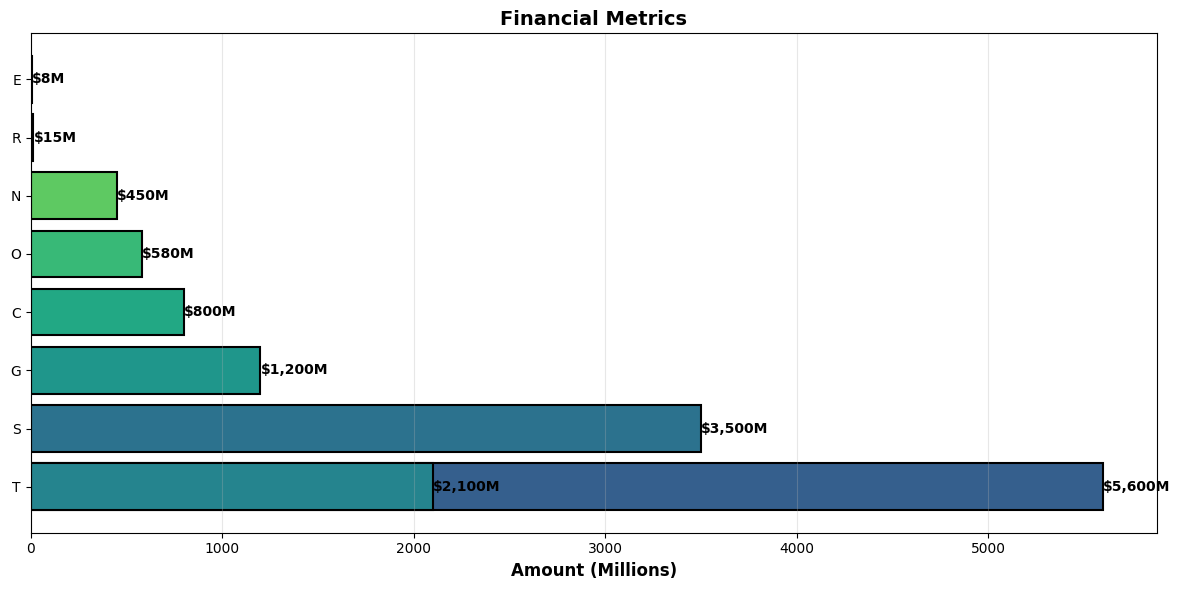

In [6]:
viz = FinancialVisualizer('../assets')

# Metrics comparison
viz.plot_metrics_comparison(results['metrics'], save=False)

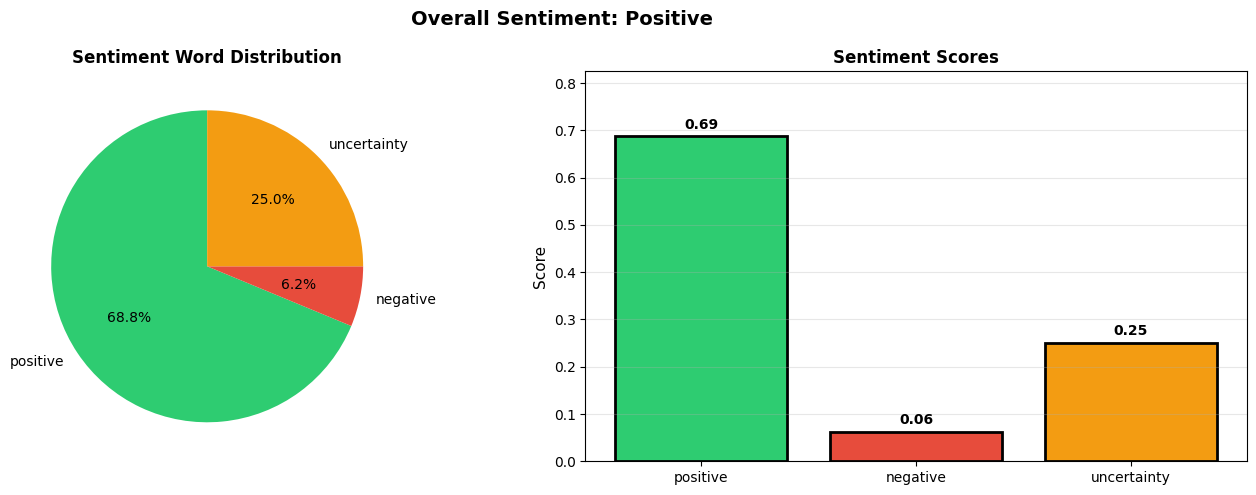

In [7]:
# Sentiment breakdown
viz.plot_sentiment_breakdown(results['sentiment'], save=False)

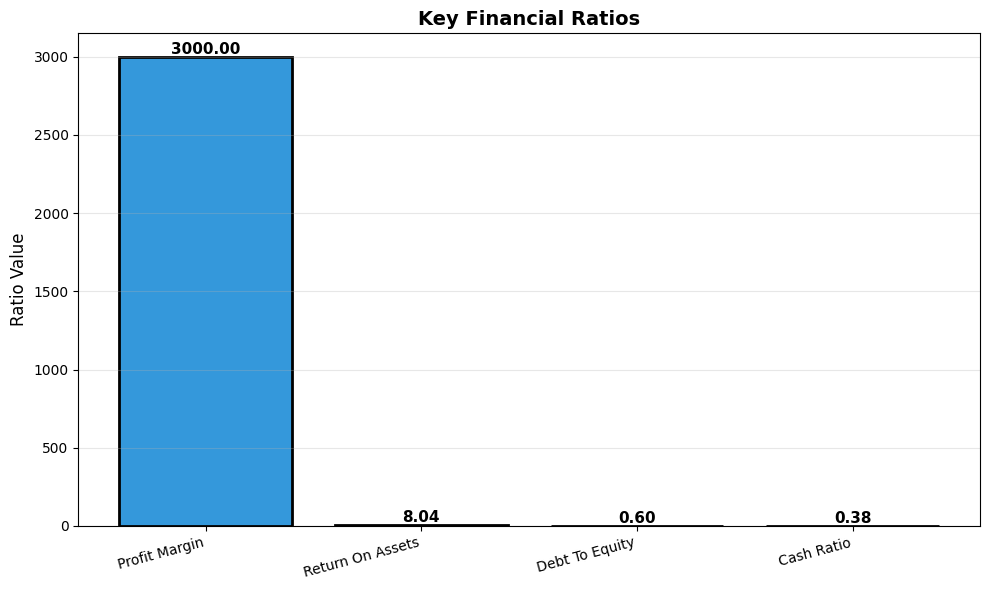

In [8]:
# Financial ratios
if results['ratios']:
    viz.plot_financial_ratios(results['ratios'], save=False)

## Complete Dashboard

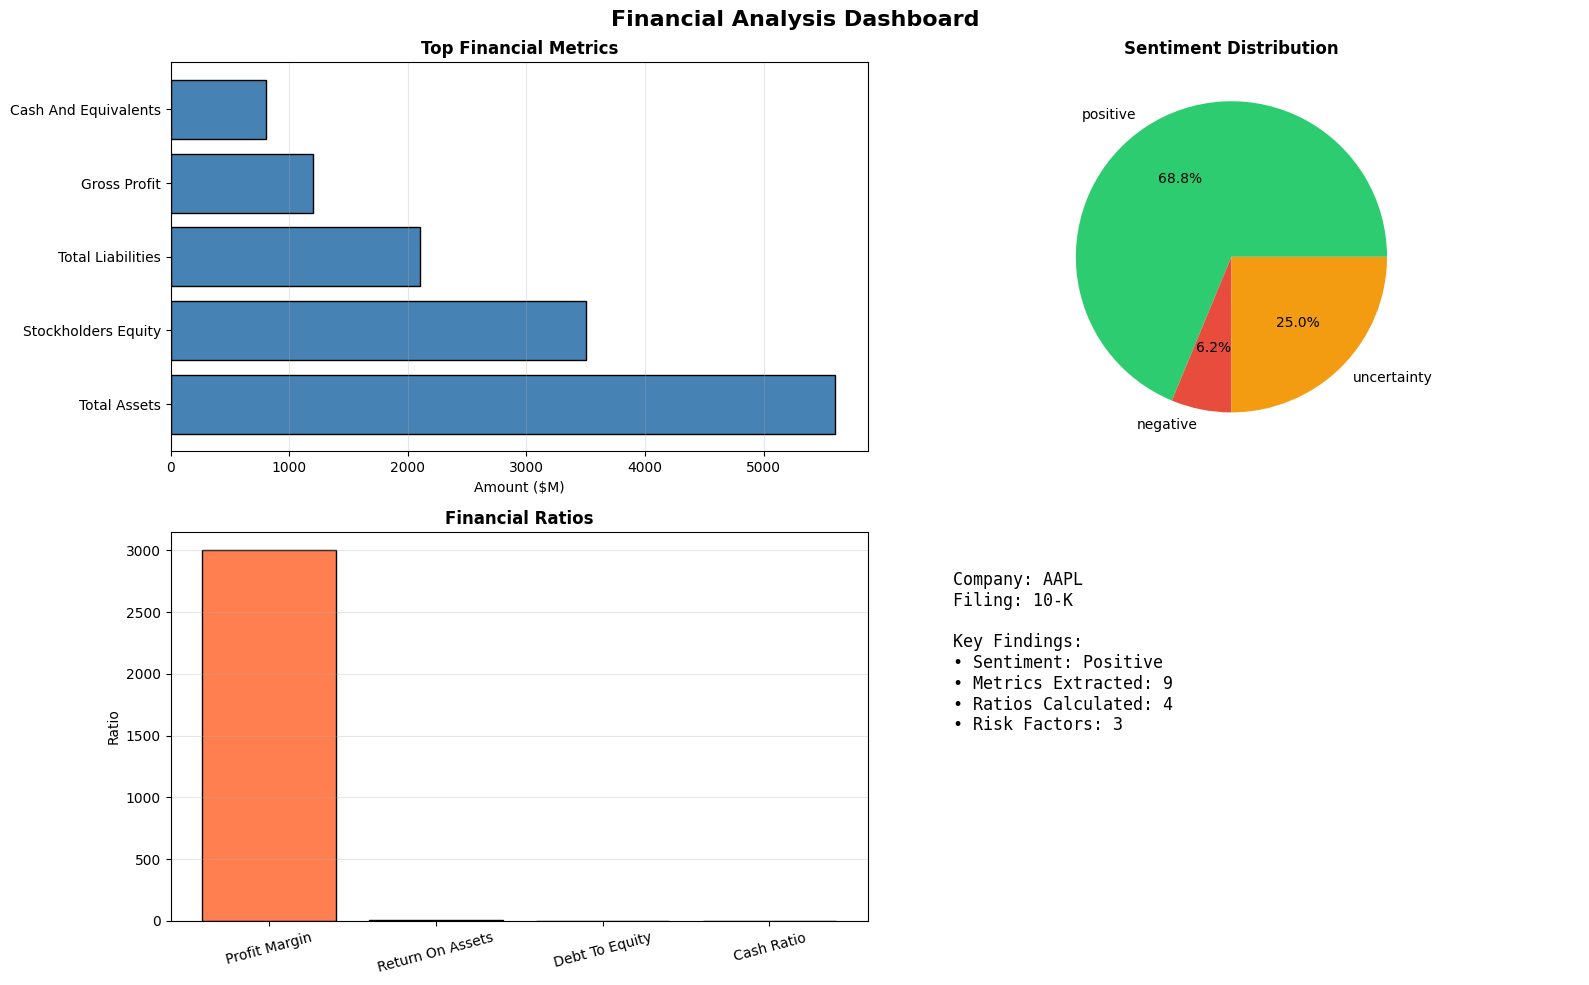

In [9]:
viz.create_dashboard(results, save=False)

## Generate Report

In [10]:
report = parser.generate_report(results)
print(report)

Financial Analysis Report
Ticker: AAPL
Filing: 10-K

Financial Metrics (in millions):
----------------------------------------
  Revenue: $15.0M
  Net Income: $450.0M
  Earnings Per Share: $8.5M
  Gross Profit: $1,200.0M
  Operating Income: $580.0M
  Total Assets: $5,600.0M
  Total Liabilities: $2,100.0M
  Cash And Equivalents: $800.0M
  Stockholders Equity: $3,500.0M

Financial Ratios:
----------------------------------------
  Profit Margin: 3000.00%
  Return On Assets: 8.04%
  Debt To Equity: 0.60
  Cash Ratio: 0.38

Sentiment Analysis:
----------------------------------------
  Overall: Positive (0.81)
  Positive mentions: 11
  Negative mentions: 1
  Uncertainty mentions: 4

Key Risk Factors:
----------------------------------------
  1. RISK FACTORS
        
        Our business faces significant risks and uncertainties...
  2. Market conditions may 
        adversely affect our operations...
  3. We anticipate continued growth but remain cautious 
        about potential challeng

## Risk Factors

In [11]:
print(f'Identified {len(results["risks"])} risk factors:\n')
for i, risk in enumerate(results['risks'][:5], 1):
    print(f'{i}. {risk[:150]}...')

Identified 3 risk factors:

1. RISK FACTORS
        
        Our business faces significant risks and uncertainties...
2. Market conditions may 
        adversely affect our operations...
3. We anticipate continued growth but remain cautious 
        about potential challenges...


## Conclusion

This notebook demonstrates:
- SEC filing parsing
- Financial metric extraction
- Sentiment analysis
- Ratio calculations
- Risk factor identification
- Comprehensive visualizations